In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [196]:
file_path = "/content/heart.xlsx"

# Carregar o arquivo corretamente
df = pd.read_excel(file_path, engine="openpyxl")

# Separar os valores corretamente usando a vírgula como delimitador
df = df.iloc[:, 0].str.split(',', expand=True)

# Definir os nomes corretos das colunas
df.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = df.apply(pd.to_numeric)

df.to_excel("/content/heart_fixed.xlsx", index=False, engine="openpyxl")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [198]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [199]:
df.duplicated().sum()

723

In [200]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [201]:
hd.describe(
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [202]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

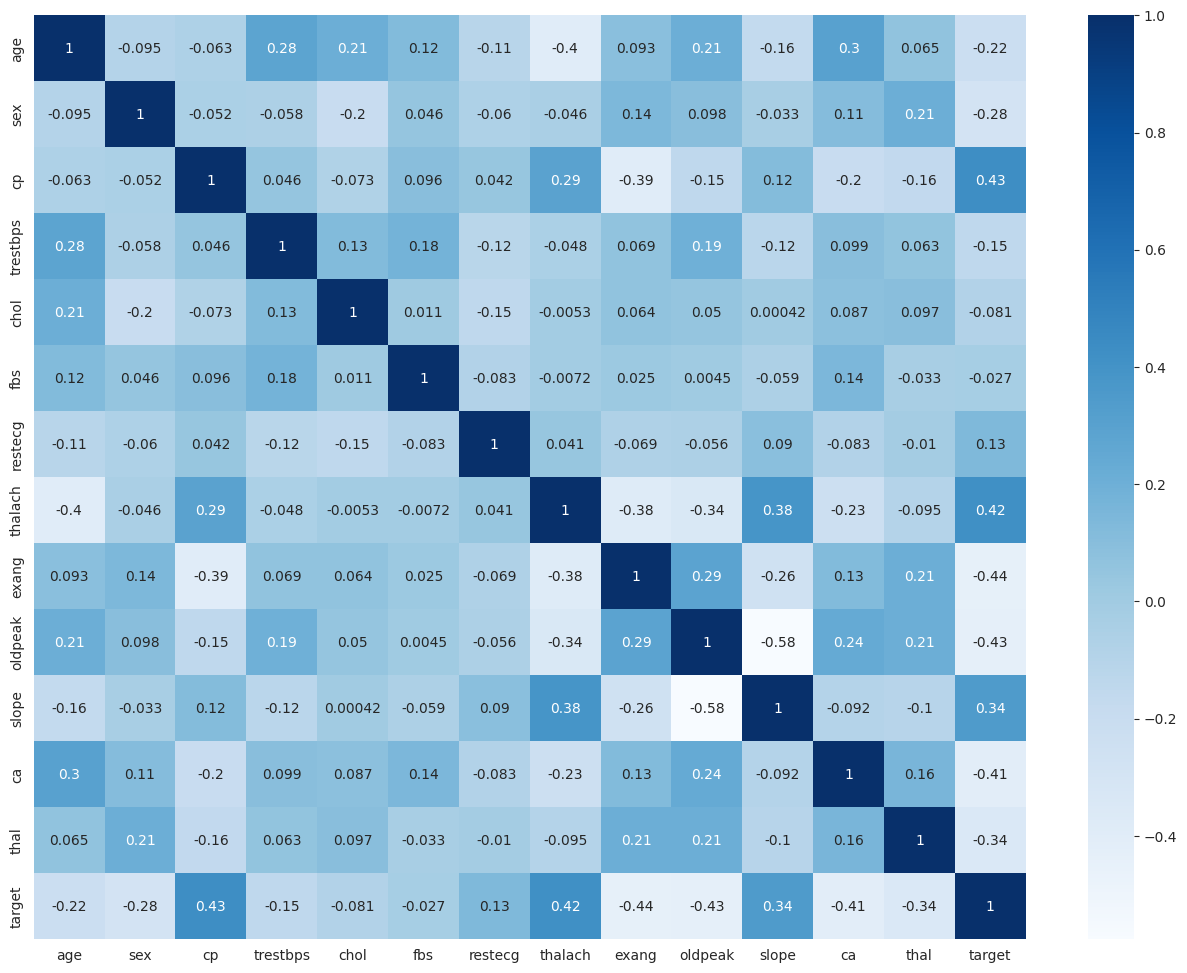

In [203]:
plt.figure(figsize=(16,12))
sns.heatmap(hd.corr(),annot = True, cmap= 'Blues')

In [204]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [205]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [206]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

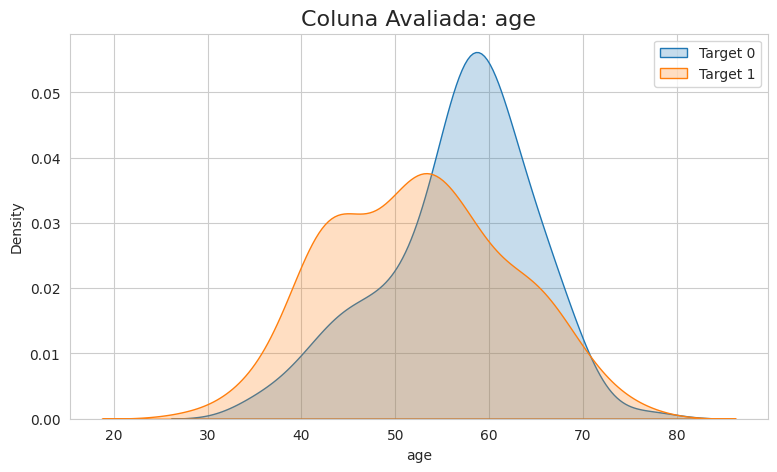

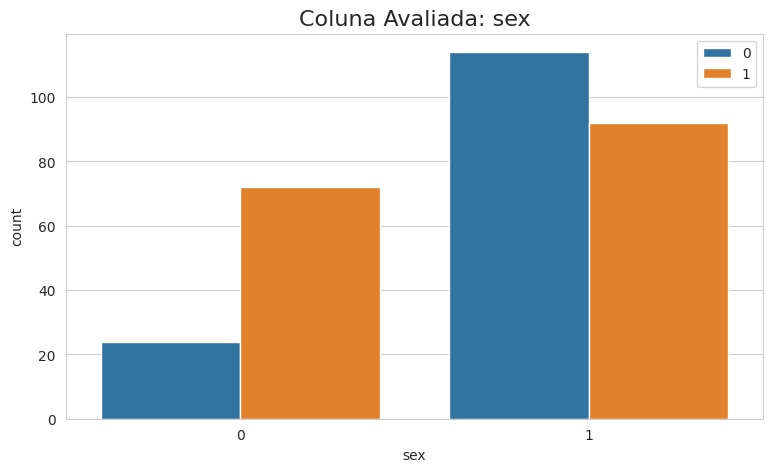

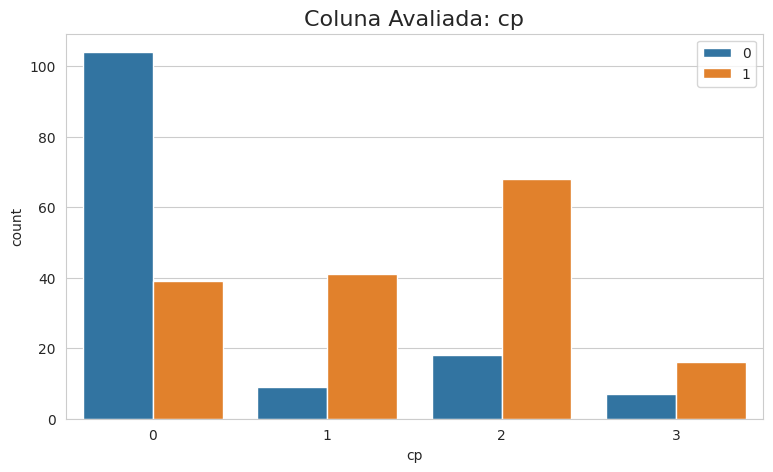

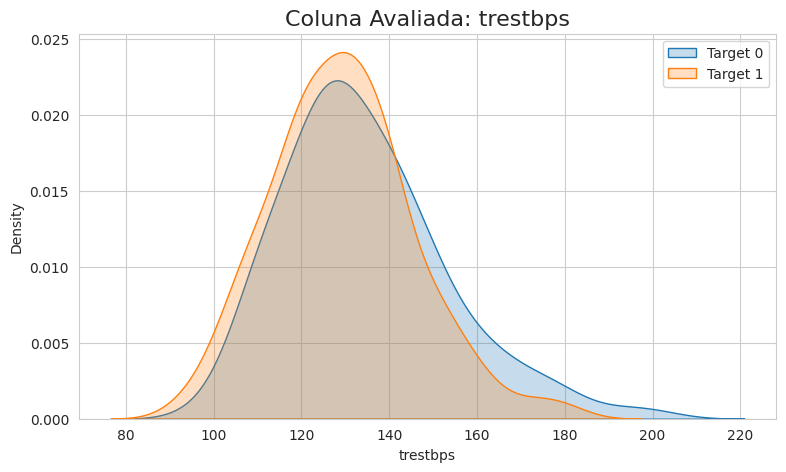

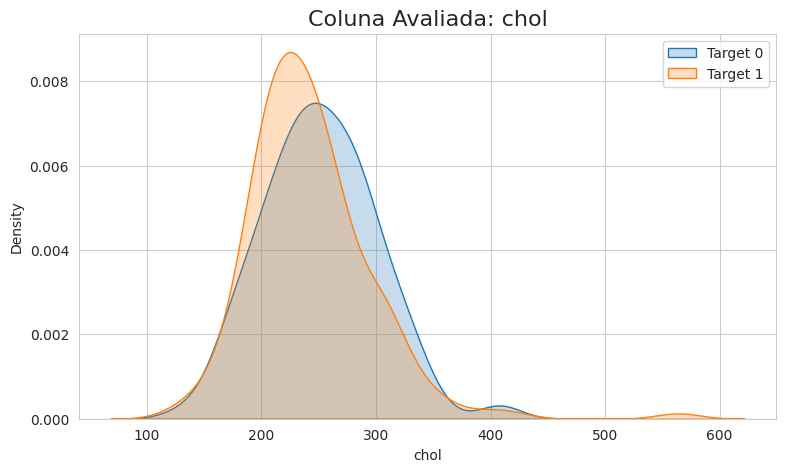

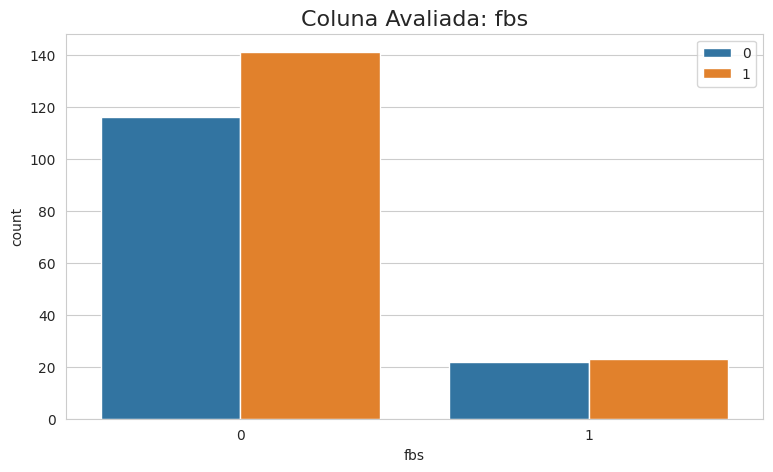

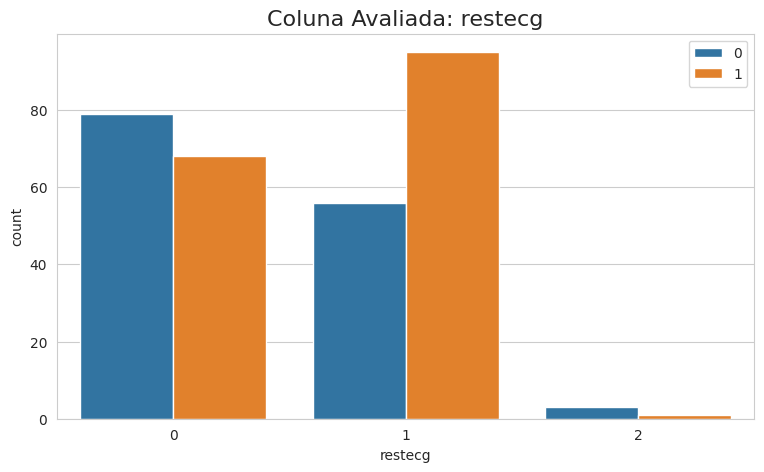

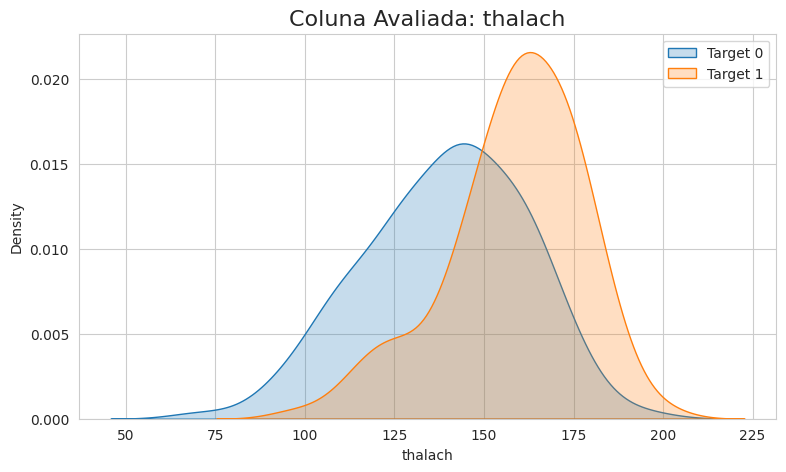

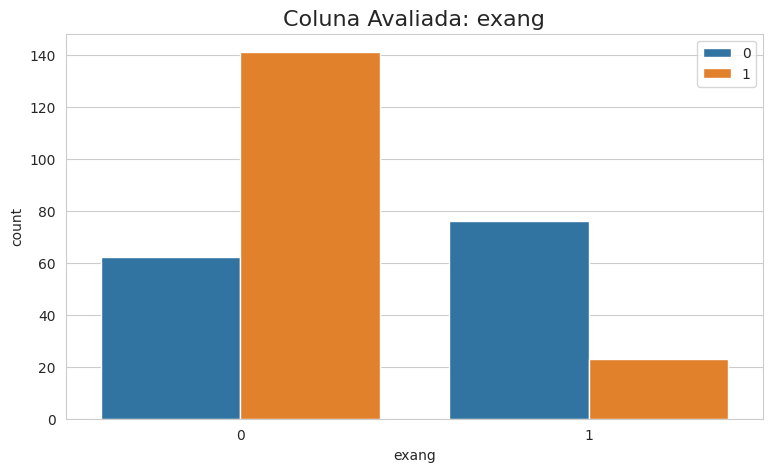

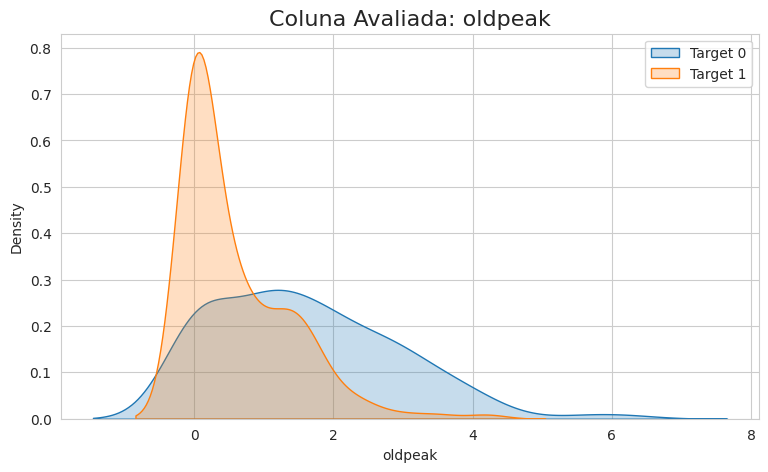

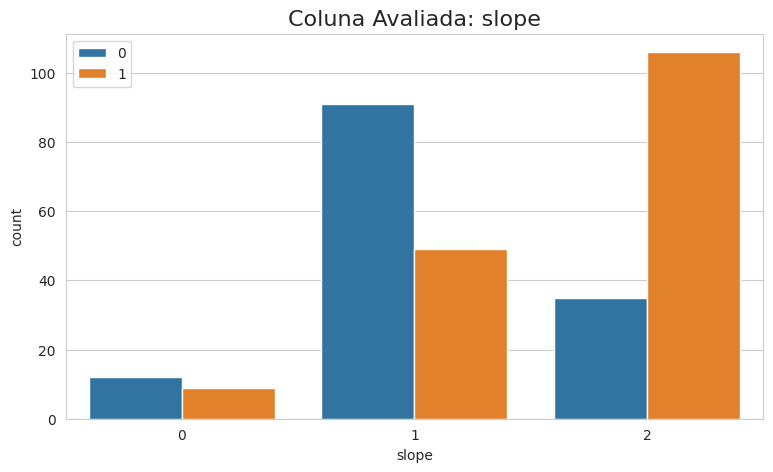

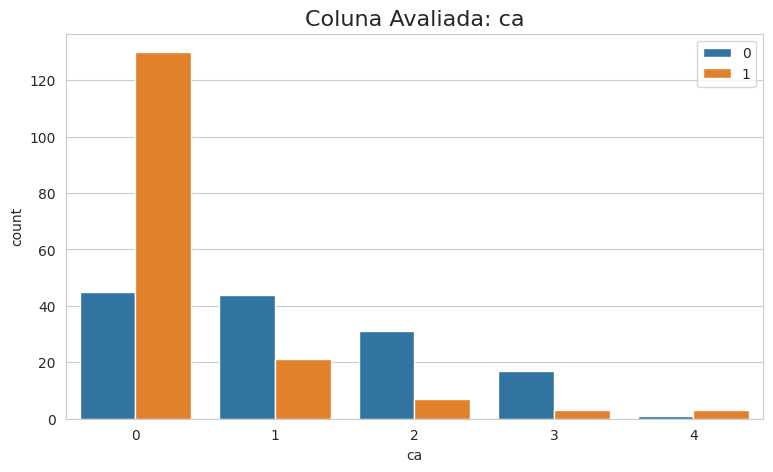

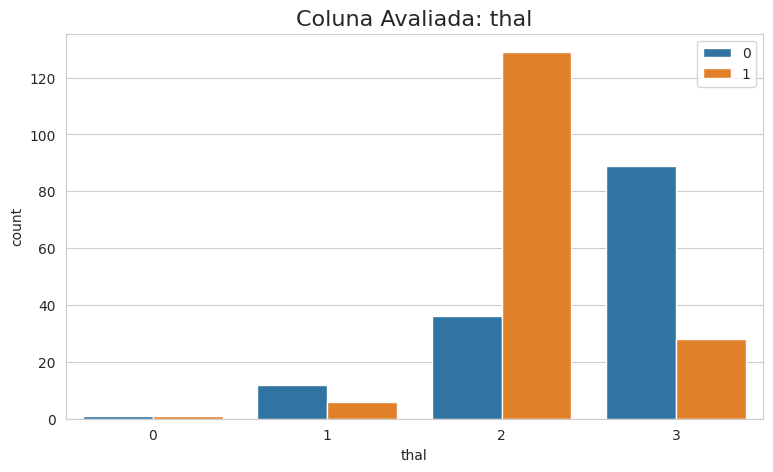

<ipython-input-207-16af7db3c204>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


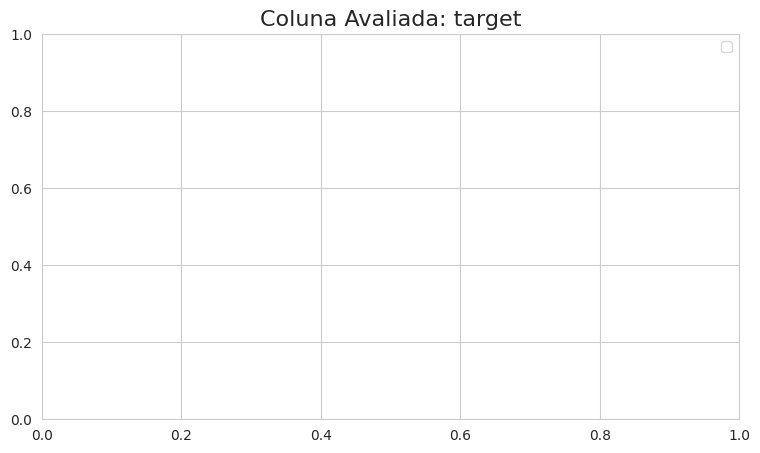

In [207]:
for c in hd.columns:
    plt.figure(figsize=(9, 5))
    plt.title(f"Coluna Avaliada: {c}", fontsize=16)

    if c in categoricas:
        sns.countplot(x=hd[c], hue=hd['target'].astype(str))

    elif c in numericas:
        for target_value in hd["target"].unique():
            sns.kdeplot(hd[hd["target"] == target_value][c], label=f"Target {target_value}", fill=True)

    plt.legend()
    plt.show()

#REMOVENDO OUTLIERS:

<Axes: >

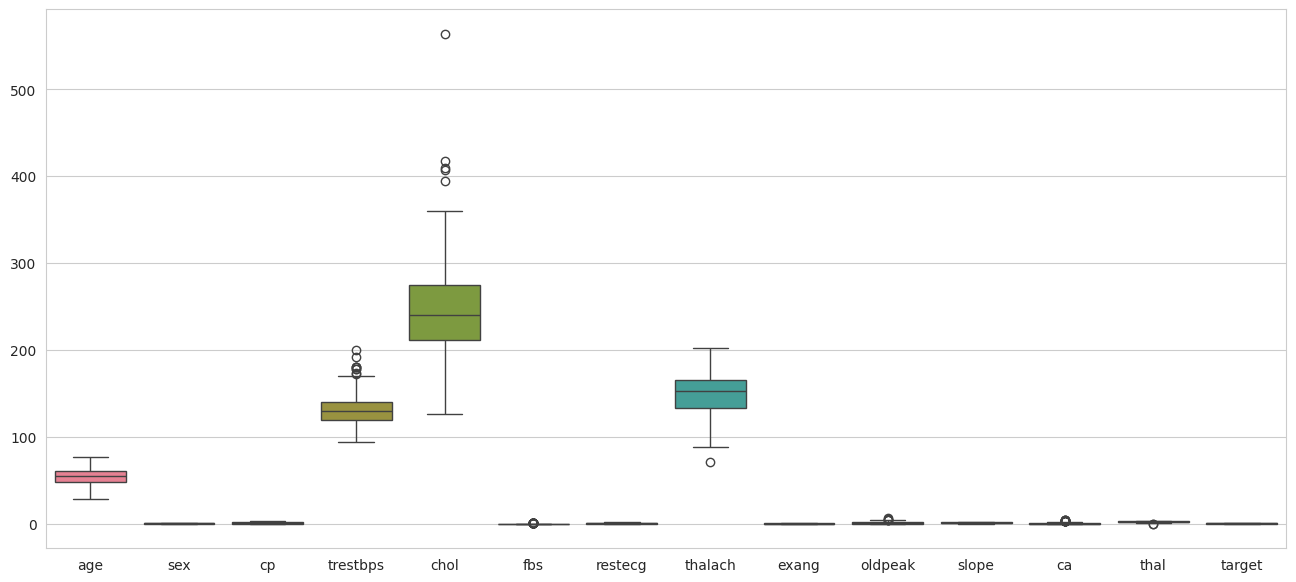

In [208]:
plt.figure(figsize= (16,7))
sns.boxplot(data =  hd)

In [209]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [210]:
hd['trestbps'].quantile(0.99)

180.0

In [211]:
hd1 = hd[hd["trestbps"] < hd['trestbps'].quantile(0.99)]

<Axes: >

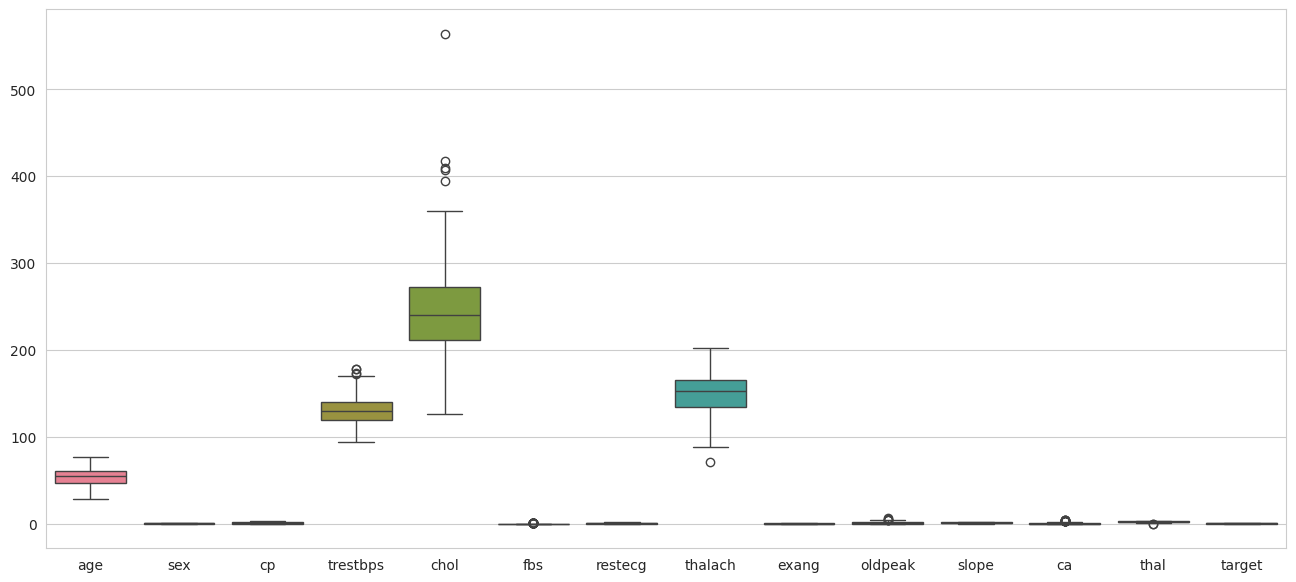

In [212]:
plt.figure(figsize= (16,7))
sns.boxplot(data = hd1)

In [213]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [214]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [215]:
hd2 = hd1[hd1["chol"] < hd['chol'].quantile(0.98)]

<Axes: >

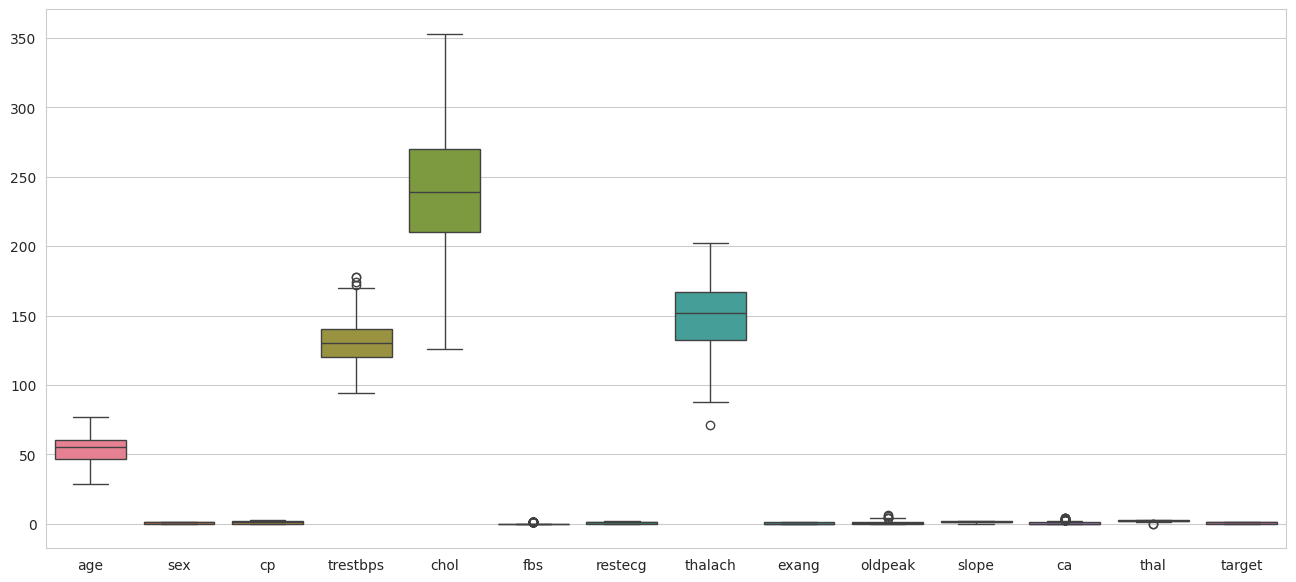

In [216]:
plt.figure(figsize= (16,7))
sns.boxplot(data = hd2)

In [217]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,54.148276,0.703448,0.972414,130.527586,241.520690,0.144828,0.534483,149.410345,0.320690,1.017586,1.400000,0.717241,2.306897,0.544828
std,9.078402,0.457527,1.035326,16.158844,43.795861,0.352535,0.520032,23.087630,0.467548,1.145082,0.615824,1.006577,0.616066,0.498847
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.250000,0.000000,0.000000,132.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.750000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,353.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [218]:
hd2['thalach'].quantile(0.005)

88.89

In [219]:
hd3 = hd2[hd2 ['thalach'] > hd2['thalach'] ].quantile(0.005)

In [220]:
hd3 = hd2[hd2["chol"] < hd['chol'].quantile(0.98)]

In [221]:
hd3 = hd3.apply(pd.to_numeric, errors='coerce')  # Converte todas as colunas para número


In [222]:
print(hd3.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


<Axes: >

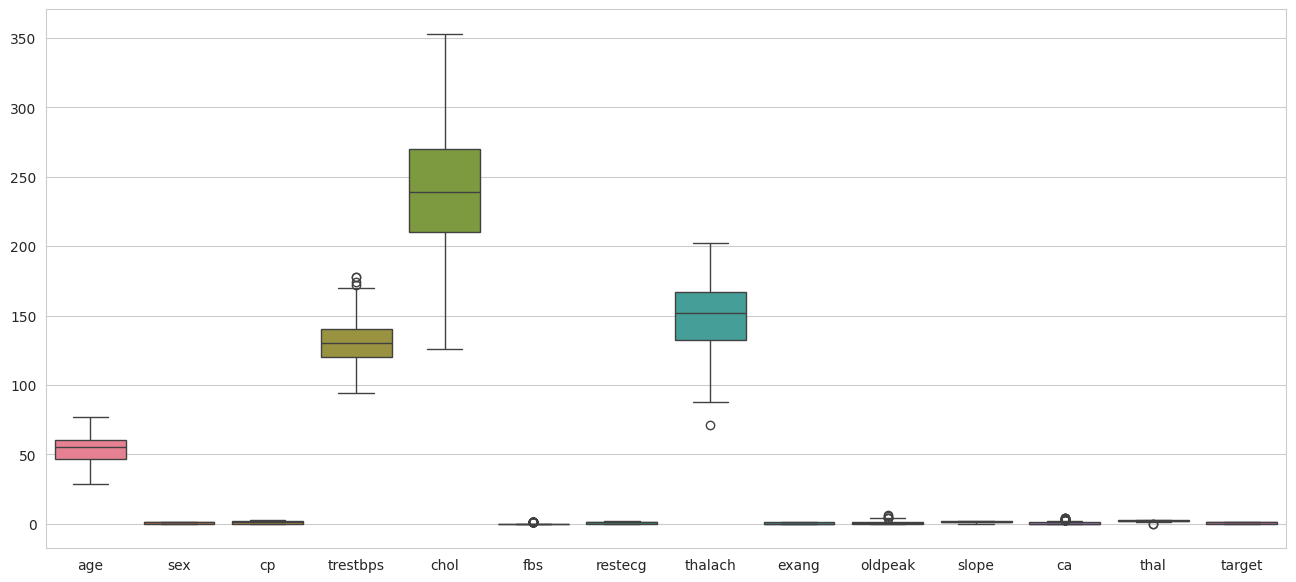

In [223]:
plt.figure(figsize= (16,7))
sns.boxplot(data = hd3)

In [224]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,54.148276,0.703448,0.972414,130.527586,241.520690,0.144828,0.534483,149.410345,0.320690,1.017586,1.400000,0.717241,2.306897,0.544828
std,9.078402,0.457527,1.035326,16.158844,43.795861,0.352535,0.520032,23.087630,0.467548,1.145082,0.615824,1.006577,0.616066,0.498847
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.250000,0.000000,0.000000,132.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.750000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,353.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [225]:
categoriicas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [226]:
hd4 = pd.get_dummies(hd3, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

#Agora começamos a pensar nos modelos de machine learning que iremos utilizar para prever doença do coração:

In [227]:
print(hd4.columns)


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [228]:
file_path = "/content/heart_fixed.xlsx"

hd4 = pd.read_excel(file_path, engine="openpyxl")

print(hd4.shape)
print(hd4.head())

(1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [229]:
hd4['chol'].max(), hd4['chol'].min()

(564, 126)

In [230]:
hd4.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [231]:
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [232]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [234]:
log = LogisticRegression(max_iter=1000)

In [235]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [236]:
log.score(X_train, y_train)

0.8719512195121951

In [237]:
log.score(X_test, y_test)

0.7951219512195122

In [238]:
y_previsto = log.predict(X_test)

In [239]:
accuracy_score(y_test, y_previsto)

0.7951219512195122

In [240]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [241]:
confusion_matrix(y_test, y_previsto)

array([[73, 29],
       [13, 90]])

In [242]:
from sklearn.metrics import confusion_matrix

confusao = confusion_matrix(y_test, y_previsto)


In [243]:
def relatorio_ml(dfl, algoritmo, opt= 2):
  X = df.drop('target', axis= 1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  if opt == 0:
   ml = algoritmo(max_iter=1000)
  elif opt == 1:
    ml = algoritmo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acuracia treino: {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print(f"Acuracia teste: {score_test * 100:.2f}%")

  y_previsto = log.predict(X_test)
  print("--- CLASSIFICATION REPORT ---")
  print(classification_report(y_test, y_previsto))
  print("--- CONFUSION MATRIX ---")

  sns.heatmap(confusao, annot = True, cmap ='Blues')

  return score_train, score_test

Acuracia treino: 87.20%
Acuracia teste: 79.51%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

--- CONFUSION MATRIX ---


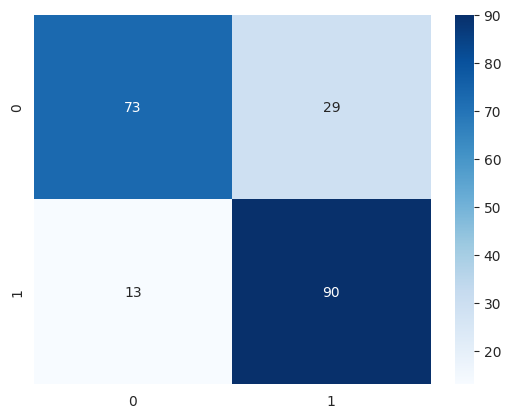

In [244]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)

Acuracia treino: 100.00%
Acuracia teste: 98.54%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

--- CONFUSION MATRIX ---


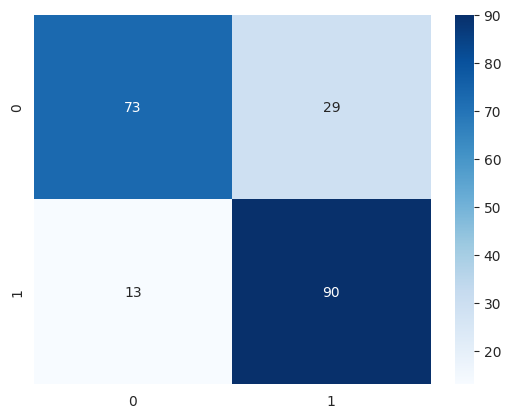

In [245]:
tree_train, tree_teste = relatorio_ml(hd4, DecisionTreeClassifier)

Acuracia treino: 100.00%
Acuracia teste: 98.54%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

--- CONFUSION MATRIX ---


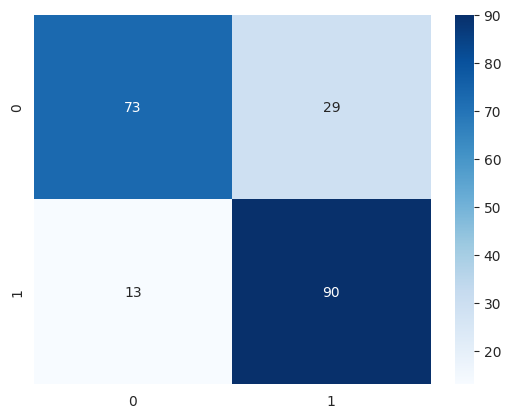

In [246]:
ada_train, ada_teste = relatorio_ml(hd4, DecisionTreeClassifier)

Acuracia treino: 92.32%
Acuracia teste: 73.17%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

--- CONFUSION MATRIX ---


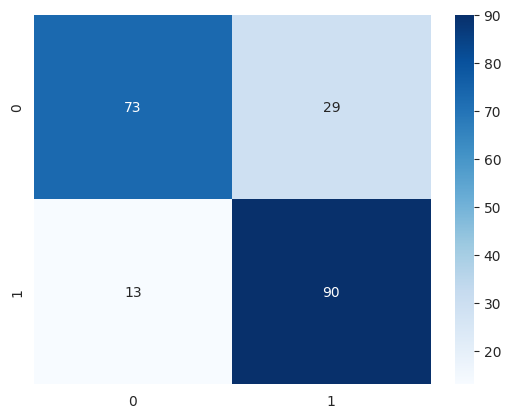

In [247]:
kn_train, kn_teste = relatorio_ml(hd4, KNeighborsClassifier)

Acuracia treino: 100.00%
Acuracia teste: 98.54%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

--- CONFUSION MATRIX ---


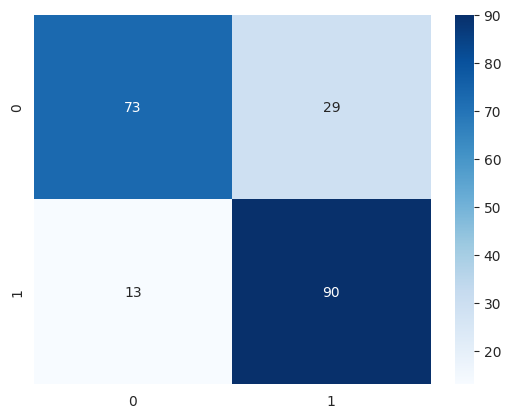

In [248]:
rand_train, rand_teste = relatorio_ml(hd4, RandomForestClassifier)

In [249]:
data = {"Models": ["Logistic Regression", "Decision Tree", "KNeighbors", "Random Forest Classifier", "Ada Boost"],
    'Acurácia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train *100, 2),
                        round(rand_train * 100, 2), round(tree_teste * 100, 2)],
    'Acurácia Teste': [round(log_test * 100, 2), round(tree_teste * 100, 2), round(kn_teste * 100, 2),
                    round(rand_teste * 100, 2), round(tree_teste * 100, 2)],
        }


df = pd.DataFrame(data)
df.sort_values(by=["Acurácia Teste"], ascending=False, inplace=True)
df

,Models,Acurácia Treino,Acurácia Teste
1,Decision Tree,100.00,98.54
3,Random Forest Classifier,100.00,98.54
4,Ada Boost,98.54,98.54
0,Logistic Regression,87.20,79.51
2,KNeighbors,92.32,73.17


In [265]:
def relatorio_ml(dfl, algoritmo, opt= 2):
  X = df.drop('target', axis= 1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
  scaler = StandardScaler()
  X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
  X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

  if opt == 0:
   ml = algoritmo(max_iter=1000)
  elif opt == 1:
    ml = algoritmo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acuracia treino: {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print(f"Acuracia teste: {score_test * 100:.2f}%")

  y_previsto = log.predict(X_test)
  print("--- CLASSIFICATION REPORT ---")
  print(classification_report(y_test, y_previsto))
  print("--- CONFUSION MATRIX ---")

  sns.heatmap(confusao, annot = True, cmap ='Blues')

  return score_train, score_test

In [267]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression(), opt=0)

In [269]:
data = {"Models": ["Logistic Regression", "Decision Tree", "KNeighbors", "Random Forest Classifier", "Ada Boost"],
    'Acurácia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train *100, 2),
                        round(rand_train * 100, 2), round(tree_teste * 100, 2)],
    'Acurácia Teste': [round(log_test * 100, 2), round(tree_teste * 100, 2), round(kn_teste * 100, 2),
                    round(rand_teste * 100, 2), round(tree_teste * 100, 2)],
        }
df = pd.DataFrame(data)
df.sort_values(by=["Acurácia Teste"], ascending=False, inplace=True)
df

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,8720.00,7951.00
1,Decision Tree,100.00,98.54
3,Random Forest Classifier,100.00,98.54
4,Ada Boost,98.54,98.54
2,KNeighbors,92.32,73.17


In [268]:
df

,Models,Acurácia Treino,Acurácia Teste
1,Decision Tree,100.00,98.54
3,Random Forest Classifier,100.00,98.54
4,Ada Boost,98.54,98.54
0,Logistic Regression,87.20,79.51
2,KNeighbors,92.32,73.17
